# Moroccan real estate market analysis

In [23]:
import pandas as pd

df = pd.read_csv("data/processed-data.csv")

df['squareMeterPrice'] = df['price'] / df['size']

## Ads geographical distribution

In [24]:
import folium
from folium.plugins import HeatMap

folium_map = folium.Map([32.0, -7.0], zoom_start=6)
HeatMap(
    data=df[["latitude", "longitude"]],
    radius=10
).add_to(folium_map)

folium_map

## Preparing the subplots

In [25]:
import matplotlib.pyplot as plt

plt.ioff()  # Prevents automatic display of figures until explicitly calling the show() method.

_, axes = plt.subplots(1, 3, figsize=(18, 6))

## Property prices and sizes frequency

In [26]:
axes[0].hist(df["price"], bins=30, color="black", alpha=0.7)

ymin, ymax = axes[0].get_ylim()  # Get the current axis y limits

for percentage, color in [(20, "orange"), (80, "red")]:
    percentile = df['price'].quantile(percentage / 100)
    axes[0].axvline(percentile, color=color, linestyle='--', label=f"{percentage}% Percentile")
    axes[0].text(percentile, (ymax - ymin) / 2, f'{int(percentile)} MAD', color=color, fontweight='bold', rotation=-90,
                 verticalalignment="center")

axes[0].set_title("Property Price Histogram")
axes[0].set_xlabel("Price (MAD)")
axes[0].set_ylabel("Frequency")

axes[0].tick_params(axis="x", rotation=45)
axes[0].ticklabel_format(axis="x", style="plain")
axes[0].grid(axis="y", linestyle="--", alpha=0.5)
axes[0].legend()

In [27]:
axes[1].hist(df["size"], bins=30, color="black", alpha=0.7)

ymin, ymax = axes[1].get_ylim()  # Get the current axis y limits

for percentage, color in [(20, "orange"), (80, "red")]:
    percentile = df['size'].quantile(percentage / 100)
    axes[1].axvline(percentile, color=color, linestyle='--', label=f"{percentage}% Percentile")
    axes[1].text(percentile, (ymax - ymin) / 2, f'{int(percentile)} m²', color=color, fontweight='bold', rotation=-90,
                 verticalalignment="center")

axes[1].set_title("Property Size Histogram")
axes[1].set_xlabel("Size (m²)")
axes[1].set_ylabel("Frequency")

axes[1].ticklabel_format(axis="x", style="plain")
axes[1].grid(axis="y", linestyle="--", alpha=0.5)
axes[1].legend()

In [28]:
axes[2].hist(df["squareMeterPrice"], bins=30, color="black", alpha=0.7)

ymin, ymax = axes[2].get_ylim()  # Get the current axis y limits

for percentage, color in [(20, "orange"), (80, "red")]:
    percentile = df['squareMeterPrice'].quantile(percentage / 100)
    axes[2].axvline(percentile, color=color, linestyle='--', label=f"{percentage}% Percentile")
    axes[2].text(percentile, (ymax - ymin) / 2, f'{int(percentile)} MAD / m²', color=color, fontweight='bold', rotation=-90,
                 verticalalignment="center")

axes[2].set_title("Unit Price Histogram")
axes[2].set_xlabel("Price (MAD / m²)")
axes[2].set_ylabel("Frequency")

axes[2].ticklabel_format(axis="x", style="plain")
axes[2].grid(axis="y", linestyle="--", alpha=0.5)
axes[2].legend()

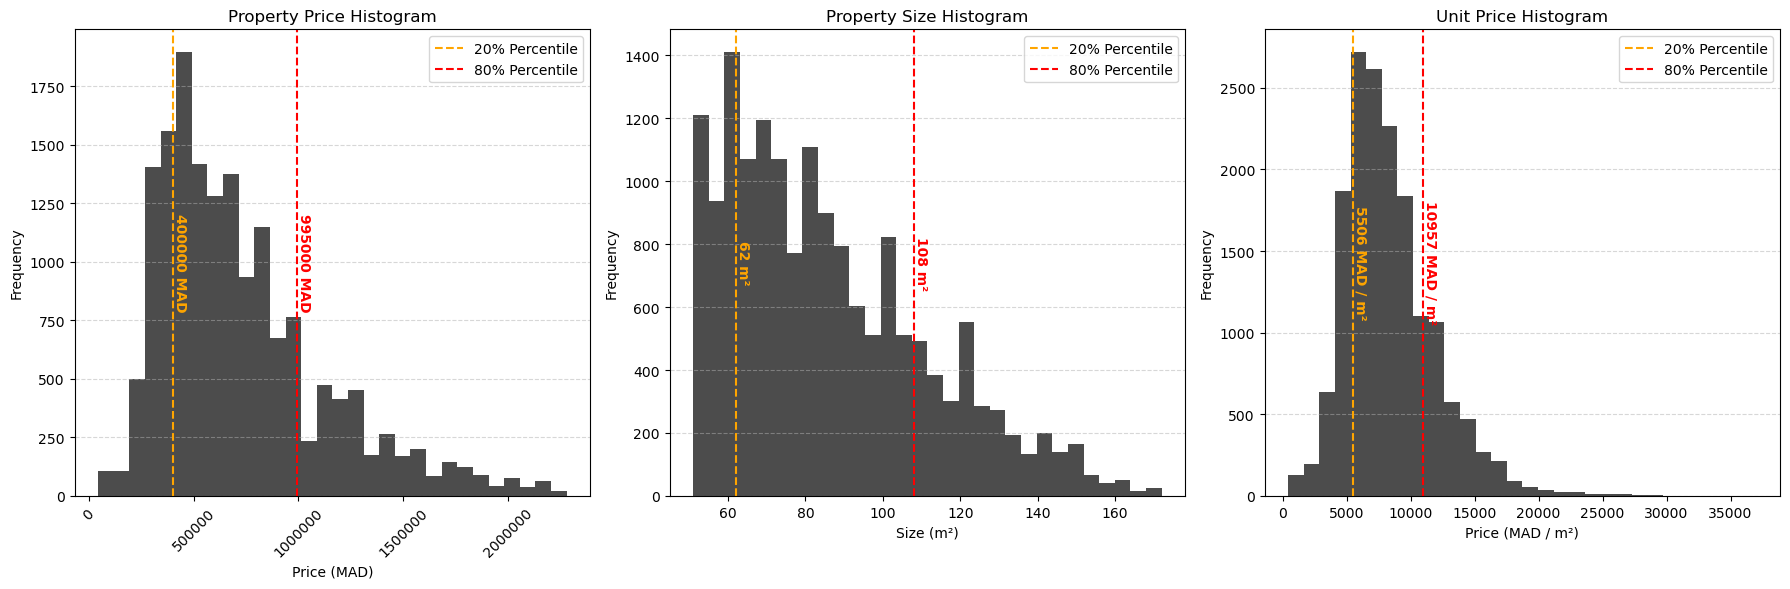

In [29]:
plt.ion()  # Re-enables interactive mode before the final display
plt.tight_layout()
plt.show()

Looking at the plots above, we notice a trend of prices below 78,000 MAD, sizes below 92m² and unit prices below 15,000 MAD/m²

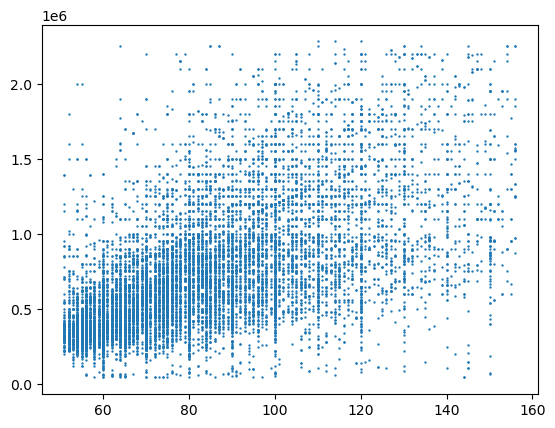

In [30]:
plt.scatter(data=df, x='habitable_size', y='price', s=.5)
plt.show()

In [31]:
df

,adId,listId,listTime,title,description,priceStr,price,categoryId,categoryName,parentCategoryId,...,rooms,bathrooms,size,latitude,longitude,EXTRA_ROOMS,EXTRA_BATHROOMS,EXTRA_SPARE_ROOMS,EXTRA_FLOOR,squareMeterPrice
0,74284316,55281448,2024-07-23 00:16:00+00:00,appartement vendre,"Appt (142 m2 et 19 m2 garage) orienté sud, ens...",200000 DH,200000.0,1010,Appartements,1200,...,2,2,161.0,33.578000,-7.615000,False,False,False,False,1242.236025
1,74284223,55281249,2024-07-22 22:45:00+00:00,Appartement à vendre 90 m² à Drargua,Appartement à vendre 2 facades titré lotisseme...,590000 DH,590000.0,1010,Appartements,1200,...,2,2,102.0,30.452900,-9.480820,False,False,False,False,5784.313725
2,74284036,55281124,2024-07-22 22:00:00+00:00,appartement,سكن جميل في حي راقي قرب متجر بيم سعيد حجي,750000 DH,750000.0,1010,Appartements,1200,...,2,2,81.0,34.074674,-6.793431,False,False,False,False,9259.259259
3,74283653,55280857,2024-07-22 20:54:00+00:00,بقعة أرضية للبيع,بقعة أرضية مساحتها 94 متر مربع .بتجربة الوفاء0...,480000 DH,480000.0,1010,Appartements,1200,...,1,1,94.0,34.261010,-6.580200,False,False,False,False,5106.382979
4,74283547,55280770,2024-07-22 20:41:00+00:00,Appartement a vendre,Appartement avec piscine pas loin de capo negro,430000 DH,430000.0,1010,Appartements,1200,...,2,1,60.0,35.849060,-5.357470,False,False,False,False,7166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16235,74180727,55201179,2024-07-07 12:49:00+00:00,Maison a El oulfa bien aéré et ensoleillé,MAison a Oulfa Hay Hassani d'une superficie de...,300000 DH,300000.0,1010,Appartements,1200,...,2,1,59.0,33.551230,-7.684563,False,False,False,False,5084.745763
16236,74180628,55201120,2024-07-07 12:40:00+00:00,شقة,شقة اللبيع في قصبة الامين الولفة طابق الأول,300000 DH,300000.0,1010,Appartements,1200,...,2,1,52.0,33.551230,-7.684563,False,False,False,False,5769.230769
16237,74180642,55201091,2024-07-07 12:36:00+00:00,Appartement à vendre 73 m² à Casablanca,شقة للبيع بمساحة 60 متر مربع مع مرأب للسيارة\n...,600000 DH,600000.0,1010,Appartements,1200,...,2,1,73.0,33.584383,-7.507205,False,False,False,False,8219.178082
16238,74180569,55201060,2024-07-07 12:33:00+00:00,Appartement à vendre 74 m² à Bouznika,شقة للبيع بمدينة بوزنيقة بواجهتين\r\nعمارة مزو...,620000 DH,620000.0,1010,Appartements,1200,...,2,1,74.0,33.789420,-7.159680,False,False,False,False,8378.378378
